# Midterm exam solution
## Question 1

### **1.- Data cleaning and preprocessing**

Fisrt of all, data preprocessing is the first (and arguably most important) step toward building a working machine learning model. It’s critical!

In [1]:
import pandas as pd

In [2]:
url = 'http://faculty.marshall.usc.edu/gareth-james/ISL/Auto.csv'
df = pd.read_csv(url)
df.sample(random_state=0)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
65,14.0,8,351.0,153,4129,13.0,72,1,ford galaxie 500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


As we can see from the sample and DataFrame info above, **horsepower** value and data type seem to contradict, so let us examine further

In [5]:
numeric_index = df.horsepower.str.isnumeric()
df.loc[-numeric_index,'horsepower']

32     ?
126    ?
330    ?
336    ?
354    ?
Name: horsepower, dtype: object

So we drop these intances, convert **horsepower** values to a numeric type and reset index

In [6]:
df = df.loc[numeric_index]
df['horsepower'] = pd.to_numeric(df.horsepower, errors='coerce')
df = df.reset_index(drop=True)
df['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

Now we are ready to work with our dataset

### **2.- Item (a)**

Then, applying an anonimous function, we binarize those mpg values according to the requirements.

In [7]:
df['mpg'].median()

22.75

In [8]:
df['mpg01'] = df['mpg'].apply(lambda x: 1 if x > df['mpg'].median() else 0)
df.sample(random_state=0)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
144,28.0,4,90.0,75,2125,14.5,74,1,dodge colt,1


### **3.- Item (b)**

In [9]:
import matplotlib.pyplot as plt

We do not consider **name** because it is a categorical data type; neither **mpg** since it was used to set our target

In [10]:
features_to_plot = list(df.columns.drop(['mpg','mpg01','name']))
print("Features to consider: {} \nTotal: {}".format(features_to_plot, len(features_to_plot)))

Features to consider: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin'] 
Total: 7


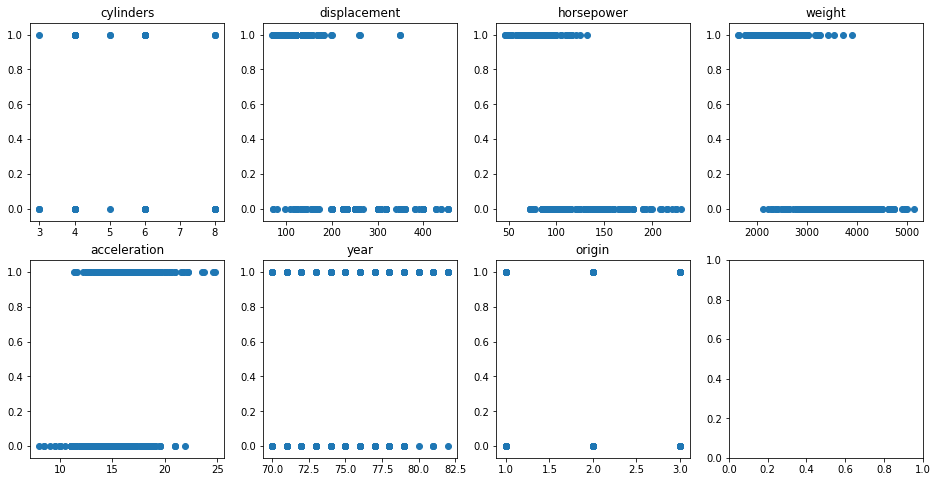

In [11]:
fig_scatter, axs = plt.subplots(2,4, figsize=(16,8))

for feature, ax in zip(features_to_plot, axs.flatten()):

    x = df[feature]
    y = df['mpg01']
    ax.scatter(x,y)
    ax.set_title(feature)
    
plt.show()

Based on the scatter plots above: **horsepower**, **weight** and **acceleration** appear to be the most useful features to  predict 

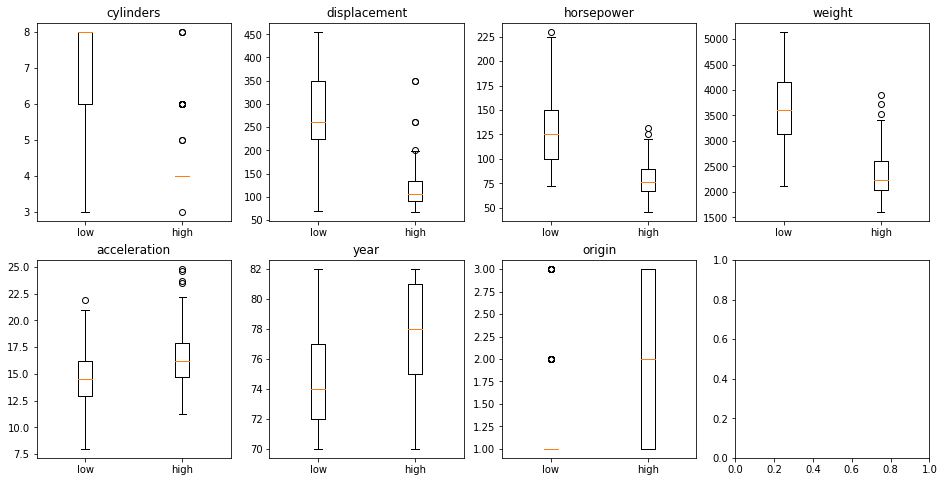

In [12]:
fig_scatter, axs = plt.subplots(2,4, figsize=(16,8))

for feature, ax in zip(features_to_plot, axs.flatten()):
    
    high = df[df['mpg01'] == 1][feature]
    low = df[df['mpg01'] == 0][feature]
    ax.boxplot([low,high], labels=['low','high'])
    ax.set_title(feature)    

plt.show()

According to the boxplots above, we discard **acceleration** and are tempted to choose beteween **displacement**, **horsepower** and **weight**.<br>
In order to take a final decision, let us check the correlation ranking:

In [13]:
df.corr()['mpg01'].abs().sort_values(ascending=False)

mpg01           1.000000
mpg             0.836939
cylinders       0.759194
weight          0.757757
displacement    0.753477
horsepower      0.667053
origin          0.513698
year            0.429904
acceleration    0.346822
Name: mpg01, dtype: float64

Finaly, we take the **displacement** and **weight** features to work with because in the next question we are ask to make some plots and we save our ready to work data for these purposes.

In [14]:
df = df.loc[:,['displacement','weight','mpg01']]
df.to_csv('auto_data.csv')
X = df.drop('mpg01', axis=1)
y = df.loc[:,['mpg01']]

### **4.- Item (c)**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
(df['mpg01'] == 1).sum() / df.shape[0]

0.5

Since our data set is balanced, stratify parameter is not needed in the **train_test_split** function

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

### **5.- Item (f)**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print("> Train error: {}%". format(round(100*(1-train_score),2)) )
print("> Test error : {}%".format(round(100*(1-test_score),2)) )

> Train error: 12.24%
> Test error : 6.12%


/home/juanca/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/juanca/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In addition, let us show the confusion matrix:

In [20]:
y_test_pred = lr.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[50,  3],
       [ 3, 42]])

Looking at the matrix avobe, the **test error** can be obtained again

### **6.- Conclusion**

Using the **displacement** and **weight** features a good test score was obtained for the chosen split; however, if we perfome a different one (another **random_state** parameter) we may obtained a worse score. In order to get a more realistic score, a cross validation would be a good idea.